In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.feature_selection import RFE
from acquire import get_db_url

## Acquire Zillow data of family homes sold in 2017

In [2]:
sql_query = """
            SELECT yearbuilt, taxvaluedollarcnt, calculatedfinishedsquarefeet, lotsizesquarefeet, fips, regionidzip, bedroomcnt, bathroomcnt,hashottuborspa, garagecarcnt, fireplacecnt,poolcnt
FROM properties_2017 
LEFT JOIN propertylandusetype  USING (propertylandusetypeid)
LEFT JOIN airconditioningtype  USING (airconditioningtypeid)
LEFT JOIN buildingclasstype  USING (buildingclasstypeid)
LEFT JOIN architecturalstyletype  USING (architecturalstyletypeid)
RIGHT JOIN predictions_2017  USING (parcelid)
WHERE propertylandusedesc = 'Single Family Residential'
AND predictions_2017.transactiondate LIKE "2017%%";
"""

In [3]:
# Create dataframe
df = pd.read_sql(sql_query, get_db_url("zillow"))

# Set to show all columns in dataframe in preview
pd.set_option('display.max_columns', None)

In [4]:
# Preview dataframe
df.head()

,yearbuilt,taxvaluedollarcnt,calculatedfinishedsquarefeet,lotsizesquarefeet,fips,regionidzip,bedroomcnt,bathroomcnt,hashottuborspa,garagecarcnt,fireplacecnt,poolcnt
0,1998.0,1023282.0,3100.0,4506.0,6059.0,96978.0,4.0,3.5,NaN,2.0,NaN,NaN
1,1967.0,464000.0,1465.0,12647.0,6111.0,97099.0,2.0,1.0,NaN,1.0,1.0,NaN
2,1962.0,564778.0,1243.0,8432.0,6059.0,97078.0,3.0,2.0,NaN,2.0,NaN,1.0
3,1970.0,145143.0,2376.0,13038.0,6037.0,96330.0,4.0,3.0,NaN,NaN,NaN,1.0
4,1950.0,773303.0,2962.0,63000.0,6037.0,96293.0,4.0,3.0,NaN,NaN,NaN,1.0


In [5]:
# Get Shape of dataframe
df.shape

(52441, 12)

In [6]:
# Show information of the dataframe of non-null counts and datatype for each column
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   yearbuilt                     52325 non-null  float64
 1   taxvaluedollarcnt             52440 non-null  float64
 2   calculatedfinishedsquarefeet  52359 non-null  float64
 3   lotsizesquarefeet             52072 non-null  float64
 4   fips                          52441 non-null  float64
 5   regionidzip                   52415 non-null  float64
 6   bedroomcnt                    52441 non-null  float64
 7   bathroomcnt                   52441 non-null  float64
 8   hashottuborspa                1515 non-null   float64
 9   garagecarcnt                  18015 non-null  float64
 10  fireplacecnt                  7243 non-null   float64
 11  poolcnt                       11096 non-null  float64
dtypes: float64(12)
memory usage: 4.8 MB


### Create function to acquire data

In [7]:
def new_familyhome17_data():
    '''
    This function reads the telco data from the Codeup db into a df.
    '''
    sql_query = """
            SELECT yearbuilt, taxvaluedollarcnt, calculatedfinishedsquarefeet, lotsizesquarefeet, fips, regionidzip, bedroomcnt, bathroomcnt,hashottuborspa, garagecarcnt, fireplacecnt,poolcnt
FROM properties_2017 
LEFT JOIN propertylandusetype  USING (propertylandusetypeid)
LEFT JOIN airconditioningtype  USING (airconditioningtypeid)
LEFT JOIN buildingclasstype  USING (buildingclasstypeid)
LEFT JOIN architecturalstyletype  USING (architecturalstyletypeid)
RIGHT JOIN predictions_2017  USING (parcelid)
WHERE propertylandusedesc = 'Single Family Residential'
AND predictions_2017.transactiondate LIKE "2017%%";
"""
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_db_url('zillow'))
    
    return df

In [8]:
import acquire

from acquire import new_familyhome17_data

In [9]:
df = acquire.new_familyhome17_data()

In [10]:
df.head()

,yearbuilt,taxvaluedollarcnt,calculatedfinishedsquarefeet,lotsizesquarefeet,fips,regionidzip,bedroomcnt,bathroomcnt,hashottuborspa,garagecarcnt,fireplacecnt,poolcnt
0,1998.0,1023282.0,3100.0,4506.0,6059.0,96978.0,4.0,3.5,NaN,2.0,NaN,NaN
1,1967.0,464000.0,1465.0,12647.0,6111.0,97099.0,2.0,1.0,NaN,1.0,1.0,NaN
2,1962.0,564778.0,1243.0,8432.0,6059.0,97078.0,3.0,2.0,NaN,2.0,NaN,1.0
3,1970.0,145143.0,2376.0,13038.0,6037.0,96330.0,4.0,3.0,NaN,NaN,NaN,1.0
4,1950.0,773303.0,2962.0,63000.0,6037.0,96293.0,4.0,3.0,NaN,NaN,NaN,1.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   yearbuilt                     52325 non-null  float64
 1   taxvaluedollarcnt             52440 non-null  float64
 2   calculatedfinishedsquarefeet  52359 non-null  float64
 3   lotsizesquarefeet             52072 non-null  float64
 4   fips                          52441 non-null  float64
 5   regionidzip                   52415 non-null  float64
 6   bedroomcnt                    52441 non-null  float64
 7   bathroomcnt                   52441 non-null  float64
 8   hashottuborspa                1515 non-null   float64
 9   garagecarcnt                  18015 non-null  float64
 10  fireplacecnt                  7243 non-null   float64
 11  poolcnt                       11096 non-null  float64
dtypes: float64(12)
memory usage: 4.8 MB


**TAKEAWAYS**
- Raw dataset has 52441 rows and  12 columns
- Need to `poolcnt` fill null values with 0 
- Need to fill `garagecarcnt` null values with 0
- Need to fill `fireplacecnt` null values with 0
- Need to fill `hashottuborspa` null values with 0

**To Do**

- Will determine what  values to  convert to integer
- Will determine what Null values to drop afterwards
- Encode or get dummies for Categorical data

## Prep the data

In [12]:
# Replace null values with 0
df["poolcnt"].fillna(0, inplace = True)
df["garagecarcnt"].fillna(0, inplace = True)
df["fireplacecnt"].fillna(0, inplace = True)
df["hashottuborspa"].fillna(0, inplace = True)

In [13]:
# Show information of the dataframe of non-null counts and datatype for each column after filling in null values with `0`
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   yearbuilt                     52325 non-null  float64
 1   taxvaluedollarcnt             52440 non-null  float64
 2   calculatedfinishedsquarefeet  52359 non-null  float64
 3   lotsizesquarefeet             52072 non-null  float64
 4   fips                          52441 non-null  float64
 5   regionidzip                   52415 non-null  float64
 6   bedroomcnt                    52441 non-null  float64
 7   bathroomcnt                   52441 non-null  float64
 8   hashottuborspa                52441 non-null  float64
 9   garagecarcnt                  52441 non-null  float64
 10  fireplacecnt                  52441 non-null  float64
 11  poolcnt                       52441 non-null  float64
dtypes: float64(12)
memory usage: 4.8 MB


In [14]:
# Drop data with null values
df.dropna(inplace=True)


In [15]:
df.shape

(51953, 12)

In [16]:
# Verfication of dropped null values
df[df.isna().any(axis=1)]

,yearbuilt,taxvaluedollarcnt,calculatedfinishedsquarefeet,lotsizesquarefeet,fips,regionidzip,bedroomcnt,bathroomcnt,hashottuborspa,garagecarcnt,fireplacecnt,poolcnt


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51953 entries, 0 to 52440
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   yearbuilt                     51953 non-null  float64
 1   taxvaluedollarcnt             51953 non-null  float64
 2   calculatedfinishedsquarefeet  51953 non-null  float64
 3   lotsizesquarefeet             51953 non-null  float64
 4   fips                          51953 non-null  float64
 5   regionidzip                   51953 non-null  float64
 6   bedroomcnt                    51953 non-null  float64
 7   bathroomcnt                   51953 non-null  float64
 8   hashottuborspa                51953 non-null  float64
 9   garagecarcnt                  51953 non-null  float64
 10  fireplacecnt                  51953 non-null  float64
 11  poolcnt                       51953 non-null  float64
dtypes: float64(12)
memory usage: 5.2 MB


**Takeaways**
- Refined dataset has 51953 rows and  12 columns after dropping null values after filling in below columns null values with '0'
-  `poolcnt` filled null values with 0 
-  `garagecarcnt` filled null values with 0
-  `fireplacecnt` filled null values with 0
-  `hashottuborspa` filled null values with 0
- 488 records was dropped. Equivalent to .01% of acquired data.

**To Do**
- Convert columns `yearbuilt`, `bedroomcnt`, `fireplacecnt`, `fips`, `regionzip`, `garagecarcnt`, `poolcnt`, `hashottuborspa` to integer


In [18]:
df.head(1)

,yearbuilt,taxvaluedollarcnt,calculatedfinishedsquarefeet,lotsizesquarefeet,fips,regionidzip,bedroomcnt,bathroomcnt,hashottuborspa,garagecarcnt,fireplacecnt,poolcnt
0,1998.0,1023282.0,3100.0,4506.0,6059.0,96978.0,4.0,3.5,0.0,2.0,0.0,0.0


In [19]:
# Convert columns from float to integer

df['yearbuilt'] = df.yearbuilt.astype(int)
df['fips'] = df.fips.astype(int)
df['regionidzip'] = df.regionidzip.astype(int)
df['bedroomcnt'] = df.bedroomcnt.astype(int) 
df['hashottuborspa'] = df.hashottuborspa.astype(int)
df['garagecarcnt'] = df.garagecarcnt.astype(int)
df['fireplacecnt'] = df.fireplacecnt.astype(int)
df['poolcnt'] = df.poolcnt.astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51953 entries, 0 to 52440
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   yearbuilt                     51953 non-null  int64  
 1   taxvaluedollarcnt             51953 non-null  float64
 2   calculatedfinishedsquarefeet  51953 non-null  float64
 3   lotsizesquarefeet             51953 non-null  float64
 4   fips                          51953 non-null  int64  
 5   regionidzip                   51953 non-null  int64  
 6   bedroomcnt                    51953 non-null  int64  
 7   bathroomcnt                   51953 non-null  float64
 8   hashottuborspa                51953 non-null  int64  
 9   garagecarcnt                  51953 non-null  int64  
 10  fireplacecnt                  51953 non-null  int64  
 11  poolcnt                       51953 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 5.2 MB


In [21]:
#Drop `regionidzip`. not needed
df.drop('regionidzip', axis=1, inplace=True)

In [22]:
df.head()

,yearbuilt,taxvaluedollarcnt,calculatedfinishedsquarefeet,lotsizesquarefeet,fips,bedroomcnt,bathroomcnt,hashottuborspa,garagecarcnt,fireplacecnt,poolcnt
0,1998,1023282.0,3100.0,4506.0,6059,4,3.5,0,2,0,0
1,1967,464000.0,1465.0,12647.0,6111,2,1.0,0,1,1,0
2,1962,564778.0,1243.0,8432.0,6059,3,2.0,0,2,0,1
3,1970,145143.0,2376.0,13038.0,6037,4,3.0,0,0,0,1
4,1950,773303.0,2962.0,63000.0,6037,4,3.0,0,0,0,1


In [23]:
df.poolcnt.value_counts()

0    40926
1    11027
Name: poolcnt, dtype: int64

In [24]:
df['fips_encoded'] = df.fips.map({6059: 2, 6037: 1, 6111: 3,})

In [25]:
df.rename(columns = {'yearbuilt':'year', 'taxvaluedollarcnt':'home_value', 'calculatedfinishedsquarefeet':'squarefeet', 'lotsizesquarefeet':'lot_size', 'bedroomcnt':'bedrooms', 'bathroomcnt':'bathrooms', 'fireplacecnt':'fireplace', 'poolcnt':'pool'}, inplace = True)

In [26]:
df.head(0)

,year,home_value,squarefeet,lot_size,fips,bedrooms,bathrooms,hashottuborspa,garagecarcnt,fireplace,pool,fips_encoded


In [27]:
df['home_age'] = 2017 - df.year
df.head()


,year,home_value,squarefeet,lot_size,fips,bedrooms,bathrooms,hashottuborspa,garagecarcnt,fireplace,pool,fips_encoded,home_age
0,1998,1023282.0,3100.0,4506.0,6059,4,3.5,0,2,0,0,2,19
1,1967,464000.0,1465.0,12647.0,6111,2,1.0,0,1,1,0,3,50
2,1962,564778.0,1243.0,8432.0,6059,3,2.0,0,2,0,1,2,55
3,1970,145143.0,2376.0,13038.0,6037,4,3.0,0,0,0,1,1,47
4,1950,773303.0,2962.0,63000.0,6037,4,3.0,0,0,0,1,1,67


Encode fips
- 6037 : 1
- 6059 : 2
- 6111 : 3

### Create function that cleans and preps the data prior to scaling and split into train, validate and test samples.

In [28]:
def prep_familyhome17():
    df = acquire.new_familyhome17_data()
    df["poolcnt"].fillna(0, inplace = True)
    df["garagecarcnt"].fillna(0, inplace = True)
    df["fireplacecnt"].fillna(0, inplace = True)
    df["hashottuborspa"].fillna(0, inplace = True)
    df.dropna(inplace=True)
    df['yearbuilt'] = df.yearbuilt.astype(int)
    df['fips'] = df.fips.astype(int)
    df['regionidzip'] = df.regionidzip.astype(int)
    df['bedroomcnt'] = df.bedroomcnt.astype(int) 
    df['hashottuborspa'] = df.hashottuborspa.astype(int)
    df['garagecarcnt'] = df.garagecarcnt.astype(int)
    df['fireplacecnt'] = df.fireplacecnt.astype(int)
    df['poolcnt'] = df.poolcnt.astype(int)
    df.drop('regionidzip', axis=1, inplace=True)
    df.rename(columns = {'yearbuilt':'year', 'taxvaluedollarcnt':'home_value', 'calculatedfinishedsquarefeet':'squarefeet', 'lotsizesquarefeet':'lot_size', 'bedroomcnt':'bedrooms', 'bathroomcnt':'bathrooms', 'fireplacecnt':'fireplace', 'poolcnt':'pool'}, inplace = True)
    df['fips_encoded'] = df.fips.map({6059: 2, 6037: 1, 6111: 3,})
    df['home_age'] = 2017 - df.year
    #df.drop('fips' 'year', axis=1, inplace=True)

    return df

In [29]:
# Create Dataframe from function
df = pd.DataFrame(prep_familyhome17())

In [30]:
# Review dataframe
df.head()

,year,home_value,squarefeet,lot_size,fips,bedrooms,bathrooms,hashottuborspa,garagecarcnt,fireplace,pool,fips_encoded,home_age
0,1998,1023282.0,3100.0,4506.0,6059,4,3.5,0,2,0,0,2,19
1,1967,464000.0,1465.0,12647.0,6111,2,1.0,0,1,1,0,3,50
2,1962,564778.0,1243.0,8432.0,6059,3,2.0,0,2,0,1,2,55
3,1970,145143.0,2376.0,13038.0,6037,4,3.0,0,0,0,1,1,47
4,1950,773303.0,2962.0,63000.0,6037,4,3.0,0,0,0,1,1,67


In [31]:
# Review dataframe from details
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51953 entries, 0 to 52440
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            51953 non-null  int64  
 1   home_value      51953 non-null  float64
 2   squarefeet      51953 non-null  float64
 3   lot_size        51953 non-null  float64
 4   fips            51953 non-null  int64  
 5   bedrooms        51953 non-null  int64  
 6   bathrooms       51953 non-null  float64
 7   hashottuborspa  51953 non-null  int64  
 8   garagecarcnt    51953 non-null  int64  
 9   fireplace       51953 non-null  int64  
 10  pool            51953 non-null  int64  
 11  fips_encoded    51953 non-null  int64  
 12  home_age        51953 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 5.5 MB


## Split data into 3 samples

In [32]:
train, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train, test_size=.3, random_state=123)

In [33]:
train.shape, validate.shape, test.shape

((29093, 13), (12469, 13), (10391, 13))

In [34]:
# split  data into train test and validate samples

def split_familyhome17(df):
    train, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train, test_size=.3, random_state=123)
    return train, validate, test

## Explore data

Initial questions 
- Does square footage (continuous variable) factor into the home value (continuous variable)?


- Does the lot size (continuous variable) help impact the home value (continuous variable)?


- Does having features like a garage, pool, fire place, spa or hot tub (categorical variable) increase the home value (continuous variable)?


- The fips (categorical variable) of a home impacts the home value (continuous variable)



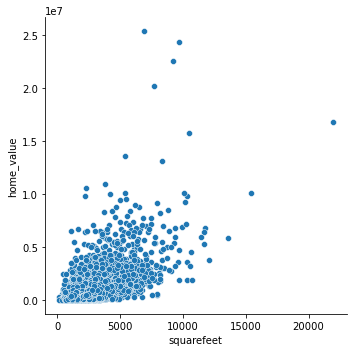

In [36]:
sns.relplot(x="squarefeet", y="home_value", data=train)
plt.show()

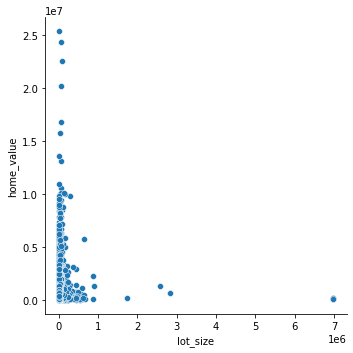

In [37]:
sns.relplot(x="lot_size", y="home_value", data=train)
plt.show()

In [38]:
# create a sample of train 
sample = train.sample(frac=0.05)

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 77.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 58.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 30.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='fips', ylabel='home_value'>

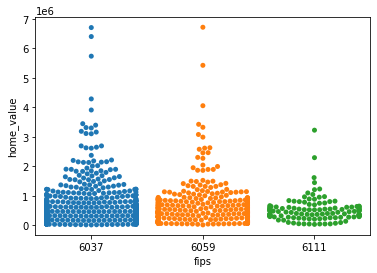

In [39]:
# plot sample size of train 
sns.swarmplot(x='fips', y='home_value', data=sample)

<AxesSubplot:xlabel='fips', ylabel='home_value'>

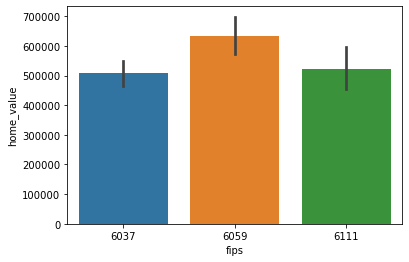

In [40]:
# Plot of the distribution of fips vs home value
sns.barplot(x='fips', y='home_value', data=sample)

<AxesSubplot:xlabel='garagecarcnt', ylabel='home_value'>

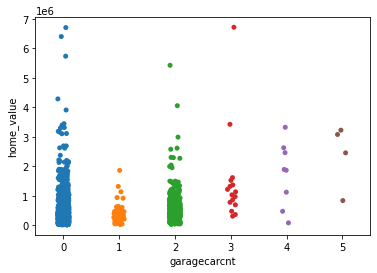

In [41]:
sns.stripplot(x='garagecarcnt', y='home_value', data=sample)

<AxesSubplot:xlabel='garagecarcnt', ylabel='home_value'>

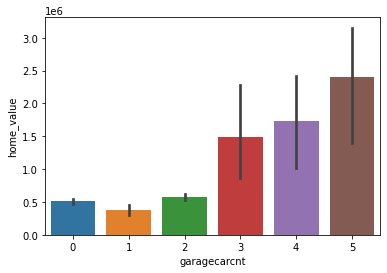

In [42]:
sns.barplot(x='garagecarcnt', y='home_value', data=sample)

In [43]:
# Create the correlation matrix for all exams.

zill_corr = train.corr()
zill_corr


,year,home_value,squarefeet,lot_size,fips,bedrooms,bathrooms,hashottuborspa,garagecarcnt,fireplace,pool,fips_encoded,home_age
year,1.000000,0.183667,0.457174,0.038428,0.301506,0.384845,0.523917,0.192050,0.410467,0.205695,0.123787,0.349744,-1.000000
home_value,0.183667,1.000000,0.607250,0.028473,0.025718,0.272367,0.523535,0.143099,0.103425,0.058170,0.225609,0.040806,-0.183667
squarefeet,0.457174,0.607250,1.000000,0.051079,0.113900,0.629162,0.849803,0.240047,0.242823,0.171450,0.365466,0.136208,-0.457174
lot_size,0.038428,0.028473,0.051079,1.000000,-0.006798,0.014511,0.037209,-0.000511,-0.012034,0.007770,0.024526,-0.013634,-0.038428
fips,0.301506,0.025718,0.113900,-0.006798,1.000000,0.140461,0.114951,0.082733,0.736790,0.630079,0.012378,0.963290,-0.301506
bedrooms,0.384845,0.272367,0.629162,0.014511,0.140461,1.000000,0.642822,0.134775,0.212387,0.145440,0.260456,0.157412,-0.384845
bathrooms,0.523917,0.523535,0.849803,0.037209,0.114951,0.642822,1.000000,0.202308,0.232042,0.142343,0.327822,0.139700,-0.523917
hashottuborspa,0.192050,0.143099,0.240047,-0.000511,0.082733,0.134775,0.202308,1.000000,0.282066,0.042103,0.205153,0.153258,-0.192050
garagecarcnt,0.410467,0.103425,0.242823,-0.012034,0.736790,0.212387,0.232042,0.282066,1.000000,0.511846,0.071753,0.862480,-0.410467
fireplace,0.205695,0.058170,0.171450,0.007770,0.630079,0.145440,0.142343,0.042103,0.511846,1.000000,0.098871,0.607741,-0.205695


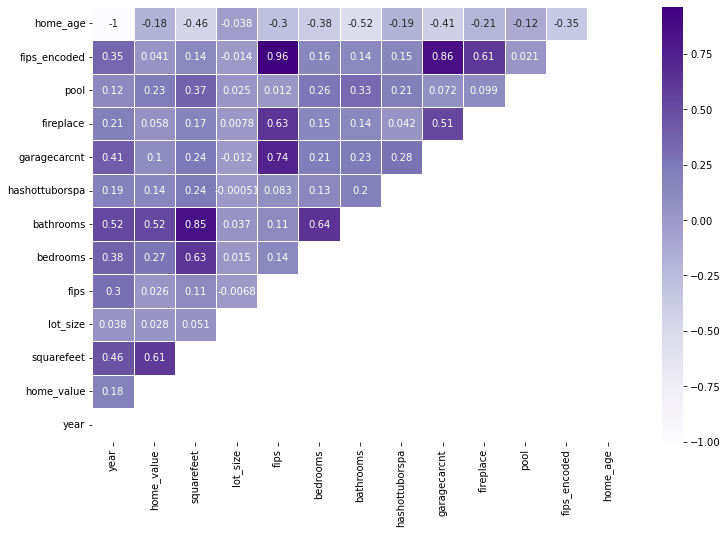

In [46]:
plt.figure(figsize=(12,8))
sns.heatmap(zill_corr, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(zill_corr))
plt.ylim(0, 13)

plt.show()


**Takeaways**

## Scaling the data to normalize it

In [47]:
rbs = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.


In [48]:
def scale_data(train, validate, test):
    
    scale_columns = [ 'squarefeet', 'lot_size', 'bedrooms', 'bathrooms','garagecarcnt', 'fips_encoded', 'home_age' ]
    
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    rbs = RobustScaler()
    
    rbs.fit(train[scale_columns])
    
    train_scaled[scale_columns] = rbs.transform(train[scale_columns])
    validate_scaled[scale_columns] = rbs.transform(validate[scale_columns])
    test_scaled[scale_columns] = rbs.transform(test[scale_columns])
    
    return train_scaled, validate_scaled, test_scaled

In [49]:
#Test my function
train_s, valid_s, test_s = scale_data(train, validate, test)

In [50]:
train_s.head()

,year,home_value,squarefeet,lot_size,fips,bedrooms,bathrooms,hashottuborspa,garagecarcnt,fireplace,pool,fips_encoded,home_age
50541,1989,686554.0,0.359691,-1.648573,6059,-1.0,0.5,0,1.0,0,0,1.0,-1.000000
22959,1909,112711.0,-0.570878,-0.512407,6037,-1.0,-1.0,0,0.0,0,0,0.0,1.758621
32939,1977,227008.0,-0.055931,-0.637407,6037,1.0,1.0,0,0.0,0,0,0.0,-0.586207
26019,1948,2100339.0,1.191900,1.218362,6037,0.0,0.0,0,0.0,0,1,0.0,0.413793
35209,1975,347952.0,0.792671,-0.032878,6059,0.0,0.5,0,1.0,0,1,1.0,-0.517241


In [51]:
# drop target variable and encoded variable from train sample 
X_train = train_s.drop(columns=['home_value', 'fips', 'year'])
X_train.head()


,squarefeet,lot_size,bedrooms,bathrooms,hashottuborspa,garagecarcnt,fireplace,pool,fips_encoded,home_age
50541,0.359691,-1.648573,-1.0,0.5,0,1.0,0,0,1.0,-1.000000
22959,-0.570878,-0.512407,-1.0,-1.0,0,0.0,0,0,0.0,1.758621
32939,-0.055931,-0.637407,1.0,1.0,0,0.0,0,0,0.0,-0.586207
26019,1.191900,1.218362,0.0,0.0,0,0.0,0,1,0.0,0.413793
35209,0.792671,-0.032878,0.0,0.5,0,1.0,0,1,1.0,-0.517241


In [52]:
y_train = train.home_value
y_train.head()

50541     686554.0
22959     112711.0
32939     227008.0
26019    2100339.0
35209     347952.0
Name: home_value, dtype: float64

## Modeling the data

In [53]:
# Create dataframe with actual and baseline home value on train

home_value_mean =  pd.DataFrame(train.home_value)

home_value_mean["baseline"]= train.home_value.mean()




In [54]:
home_value_mean.head()

,home_value,baseline
50541,686554.0,524685.288317
22959,112711.0,524685.288317
32939,227008.0,524685.288317
26019,2100339.0,524685.288317
35209,347952.0,524685.288317


In [100]:
# Create dataframe with actual and baseline home value on train

validate_home_value_mean =  pd.DataFrame(validate.home_value)

validate_home_value_mean["baseline"]= train.home_value.mean()

validate_home_value_mean.head()

,home_value,baseline
17506,48185.0,524685.288317
27563,324937.0,524685.288317
28579,516710.0,524685.288317
51883,192070.0,524685.288317
13619,265257.0,524685.288317


### Simple Model of Regression

In [102]:
from sklearn.linear_model import LinearRegression



# 1. make the thing
lm = LinearRegression()
# 2. fit the thing
lm.fit(X_train, y_train)
# 3. use the thing (make predictions)
lm_predict = train_s.drop(columns=['home_value', 'fips', 'year'])
home_value_mean['simple_lm'] = lm.predict(lm_predict)

valid_s_lm_predict = valid_s.drop(columns=['home_value', 'fips', 'year'])
validate_home_value_mean['simple_lm'] = lm.predict(valid_s_lm_predict)

In [56]:
home_value_mean.head()

,home_value,baseline,simple_lm
50541,686554.0,524685.288317,7.095288e+05
22959,112711.0,524685.288317,3.749401e+05
32939,227008.0,524685.288317,2.960199e+05
26019,2100339.0,524685.288317,1.057387e+06
35209,347952.0,524685.288317,8.360272e+05


In [103]:
validate_home_value_mean.head()

,home_value,baseline,simple_lm
17506,48185.0,524685.288317,146668.594646
27563,324937.0,524685.288317,938741.817520
28579,516710.0,524685.288317,418141.910537
51883,192070.0,524685.288317,148610.386016
13619,265257.0,524685.288317,84877.694826


In [66]:
X_train.head()

,squarefeet,lot_size,bedrooms,bathrooms,hashottuborspa,garagecarcnt,fireplace,pool,fips_encoded,home_age
50541,0.359691,-1.648573,-1.0,0.5,0,1.0,0,0,1.0,-1.000000
22959,-0.570878,-0.512407,-1.0,-1.0,0,0.0,0,0,0.0,1.758621
32939,-0.055931,-0.637407,1.0,1.0,0,0.0,0,0,0.0,-0.586207
26019,1.191900,1.218362,0.0,0.0,0,0.0,0,1,0.0,0.413793
35209,0.792671,-0.032878,0.0,0.5,0,1.0,0,1,1.0,-0.517241


In [57]:
lm.coef_, lm.intercept_

(array([ 4.88056710e+05, -6.80557633e+01, -1.45799118e+05,  1.12617924e+05,
         1.36234888e+04, -2.42874586e+04, -6.20962221e+04,  6.75866714e+03,
         4.61598413e+04,  1.12541145e+05]),
 422427.44812306843)

In [58]:
print('home value = {:.3f} * features + {:.3f}'.format(lm.coef_[0], lm.intercept_))

home value = 488056.710 * features + 422427.448


In [59]:
print(f'For every 1 point increase in Exam 1, we predict a {lm.coef_[0]:.2f} point increase in Final Grade')

For every 1 point increase in Exam 1, we predict a 488056.71 point increase in Final Grade


In [ ]:
x_pred = np.array([-25, 100]).reshape(-1, 1)
y_pred = lm.predict(x_pred)

plt.figure(figsize=(16, 9))
plt.scatter(train_s.exam1, train_s.home_value, label='actual')
plt.scatter(train.exam1, lm.predict(lm_predict), label='simple_lm')
plt.plot(x_pred, y_pred, ls='--', c='black', label='linear model prediction line')
plt.hlines(0, -25, 100, ls=':', color='grey')
plt.vlines(0, -10, 100, ls=':', color='grey')

plt.xlabel('Exam 1')
plt.ylabel('Final Grade')
plt.legend()

### Lasso Lars

In [67]:
from sklearn.linear_model import LassoLars

In [104]:
# create the model object
lars = LassoLars(alpha=5)

# fit the model to our training data= 
lars.fit(X_train, y_train)

# predict train
X_train_pred_lars = lars.predict(train_s.drop(columns=['home_value', 'fips', 'year']))

# Add lassolars predictions to our predictions DataFrame
home_value_mean['lasso_lars'] = X_train_pred_lars

home_value_mean

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


,home_value,baseline,simple_lm,lasso_lars,glm
50541,686554.0,524685.288317,7.095288e+05,7.090265e+05,7.095519e+05
22959,112711.0,524685.288317,3.749401e+05,3.722275e+05,3.748366e+05
32939,227008.0,524685.288317,2.960199e+05,2.987517e+05,2.958214e+05
26019,2100339.0,524685.288317,1.057387e+06,1.053043e+06,1.057219e+06
35209,347952.0,524685.288317,8.360272e+05,8.347469e+05,8.358427e+05
...,...,...,...,...,...
38988,429746.0,524685.288317,2.668752e+05,2.698330e+05,2.667846e+05
26488,745000.0,524685.288317,3.777112e+05,3.778496e+05,3.775812e+05
16626,460000.0,524685.288317,1.364784e+05,1.405016e+05,1.363067e+05
13378,324210.0,524685.288317,9.663543e+04,1.006749e+05,9.653697e+04


In [80]:
pd.Series(lars.coef_, index=X_train.columns).sort_values()

bedrooms         -142996.710064
fireplace         -56497.168226
garagecarcnt       -8619.725337
lot_size             -35.448505
pool                5097.873074
hashottuborspa      5678.941644
fips_encoded       31771.667515
home_age          110322.745779
bathrooms         110474.857126
squarefeet        485974.893531
dtype: float64

In [105]:
# create the model object
lars = LassoLars(alpha=5)

# fit the model to our training data= 
lars.fit(X_train, y_train)

# predict validate
X_validate_pred_lars = lars.predict(valid_s.drop(columns=['home_value', 'fips', 'year']))

# Add lassolars predictions to our predictions DataFrame
validate_home_value_mean['lasso_lars'] = X_validate_pred_lars

validate_home_value_mean

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


,home_value,baseline,simple_lm,lasso_lars
17506,48185.0,524685.288317,1.466686e+05,1.432570e+05
27563,324937.0,524685.288317,9.387418e+05,9.393757e+05
28579,516710.0,524685.288317,4.181419e+05,4.137264e+05
51883,192070.0,524685.288317,1.486104e+05,1.507788e+05
13619,265257.0,524685.288317,8.487769e+04,8.668489e+04
...,...,...,...,...
36100,367689.0,524685.288317,7.450093e+05,7.440821e+05
4102,190866.0,524685.288317,1.674385e+05,1.706175e+05
17728,126078.0,524685.288317,1.275601e+06,1.269727e+06
45766,1256551.0,524685.288317,2.003453e+06,1.995110e+06


In [ ]:
valid_s_lm_predict = valid_s.drop(columns=['home_value', 'fips', 'year'])
validate_home_value_mean['simple_lm'] = lm.predict(valid_s_lm_predict)

###  Generalized Linear Model

The most flexible regression algorithm, the GLM allows for different distributions, beyond just the Normal Distribution for OLS (and other models based on OLS, like LASSO). We will use the `TweedieRegressor` method to create a GLM using sklearn.

> `sklearn.linear_model.TweedieRegressor(power=0, alpha=1.0)`

        power = 0: Normal Distribution
        power = 1: Poisson Distribution
        power = (1,2): Compound Distribution
        power = 2: Gamma Distribution
        power = 3: Inverse Gaussian Distribution

In [89]:
from sklearn.linear_model import TweedieRegressor

# create the model object
glm = TweedieRegressor(power=0, alpha=0)

# fit the model to our training data
glm.fit(X_train, y_train)

# predict train
X_train_predict_glm = glm.predict(train_s.drop(columns=['home_value', 'fips', 'year']))

# Add lassolars predictions to our predictions DataFrame
home_value_mean['glm'] = X_train_predict_glm

home_value_mean

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


,home_value,baseline,simple_lm,lasso_lars,glm
50541,686554.0,524685.288317,7.095288e+05,7.090265e+05,7.095519e+05
22959,112711.0,524685.288317,3.749401e+05,3.722275e+05,3.748366e+05
32939,227008.0,524685.288317,2.960199e+05,2.987517e+05,2.958214e+05
26019,2100339.0,524685.288317,1.057387e+06,1.053043e+06,1.057219e+06
35209,347952.0,524685.288317,8.360272e+05,8.347469e+05,8.358427e+05
...,...,...,...,...,...
38988,429746.0,524685.288317,2.668752e+05,2.698330e+05,2.667846e+05
26488,745000.0,524685.288317,3.777112e+05,3.778496e+05,3.775812e+05
16626,460000.0,524685.288317,1.364784e+05,1.405016e+05,1.363067e+05
13378,324210.0,524685.288317,9.663543e+04,1.006749e+05,9.653697e+04


In [107]:
# create the model object
glm = TweedieRegressor(power=0, alpha=0)

# fit the model to our training data
glm.fit(X_train, y_train)

# predict validate
X_validate_predict_glm = glm.predict(valid_s.drop(columns=['home_value', 'fips', 'year']))

# Add lassolars predictions to our predictions DataFrame
validate_home_value_mean['glm'] = X_validate_predict_glm

validate_home_value_mean

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


,home_value,baseline,simple_lm,lasso_lars,glm
17506,48185.0,524685.288317,1.466686e+05,1.432570e+05,1.466445e+05
27563,324937.0,524685.288317,9.387418e+05,9.393757e+05,9.387635e+05
28579,516710.0,524685.288317,4.181419e+05,4.137264e+05,4.184509e+05
51883,192070.0,524685.288317,1.486104e+05,1.507788e+05,1.485074e+05
13619,265257.0,524685.288317,8.487769e+04,8.668489e+04,8.473595e+04
...,...,...,...,...,...
36100,367689.0,524685.288317,7.450093e+05,7.440821e+05,7.449414e+05
4102,190866.0,524685.288317,1.674385e+05,1.706175e+05,1.673355e+05
17728,126078.0,524685.288317,1.275601e+06,1.269727e+06,1.275694e+06
45766,1256551.0,524685.288317,2.003453e+06,1.995110e+06,2.003278e+06


### Comparison of models by evaluating with RMSE

In [99]:
# Model results on train sample

home_value_mean

,home_value,baseline,simple_lm,lasso_lars,glm
50541,686554.0,524685.288317,7.095288e+05,7.090265e+05,7.095519e+05
22959,112711.0,524685.288317,3.749401e+05,3.722275e+05,3.748366e+05
32939,227008.0,524685.288317,2.960199e+05,2.987517e+05,2.958214e+05
26019,2100339.0,524685.288317,1.057387e+06,1.053043e+06,1.057219e+06
35209,347952.0,524685.288317,8.360272e+05,8.347469e+05,8.358427e+05
...,...,...,...,...,...
38988,429746.0,524685.288317,2.668752e+05,2.698330e+05,2.667846e+05
26488,745000.0,524685.288317,3.777112e+05,3.778496e+05,3.775812e+05
16626,460000.0,524685.288317,1.364784e+05,1.405016e+05,1.363067e+05
13378,324210.0,524685.288317,9.663543e+04,1.006749e+05,9.653697e+04


In [98]:
# Calculate root mean squared error (RMSE) for every column in the train_predictions df
from scipy import stats
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

train_s_rmse = sqrt(mean_squared_error(home_value_mean['home_value'], home_value_mean.baseline))

def calculate_rmse(home_value_mean):
    return sqrt(mean_squared_error(home_value_mean.home_value, home_value_mean))

print('Train baseline RMSE: {}.'.format(train_s_rmse))
home_value_mean.apply(calculate_rmse).sort_values()

Train baseline RMSE: 710935.713834567.


AttributeError: 'Series' object has no attribute 'home_value'

In [97]:
train_s_rmse

710935.713834567

In [109]:
# Model results on Validate sample

validate_home_value_mean

,home_value,baseline,simple_lm,lasso_lars,glm
17506,48185.0,524685.288317,1.466686e+05,1.432570e+05,1.466445e+05
27563,324937.0,524685.288317,9.387418e+05,9.393757e+05,9.387635e+05
28579,516710.0,524685.288317,4.181419e+05,4.137264e+05,4.184509e+05
51883,192070.0,524685.288317,1.486104e+05,1.507788e+05,1.485074e+05
13619,265257.0,524685.288317,8.487769e+04,8.668489e+04,8.473595e+04
...,...,...,...,...,...
36100,367689.0,524685.288317,7.450093e+05,7.440821e+05,7.449414e+05
4102,190866.0,524685.288317,1.674385e+05,1.706175e+05,1.673355e+05
17728,126078.0,524685.288317,1.275601e+06,1.269727e+06,1.275694e+06
45766,1256551.0,524685.288317,2.003453e+06,1.995110e+06,2.003278e+06


In [111]:
validate_rmse = sqrt(mean_squared_error(validate_home_value_mean['home_value'], validate_home_value_mean.baseline))
validate_rmse

759011.2013213345